## Inferential statistics

## Introduction to Inference

* Sample Mean & Population Mean
* Statistical Inference
* Central Limit Theorem
* Confidence Intervals
* Interpretation Of Confidence Interval
* Hypothesis Testing
* Why Null Hypothesis ?
* Alternate Hypothesis
* P-Value
* t-test
* Type I and Type II error
* Chi-squared Goodness of fit test
* Chi-sqaured Test of Independence

<img src="Images/statistics.jpeg" width="700" height="400">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/insurance.csv')
data.head()
# Ramdom sample for population
indecies = np.random.randint(0,100, 100)
sample = data.iloc[indecies]

### Sample Mean and population Mean

* Let's consider a sample of 100 people at random from 1338 people
* Compute the mean, median, mode, standard deviation of sample and compare them with the total population

## Central Limit Theorem

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

Sample 1:
      age     sex    bmi  children smoker     region     charges
216   53  female  26.60         0     no  northwest  10355.6410
501   43    male  26.03         0     no  northeast   6837.3687
396   43  female  34.40         3     no  southwest   8522.0030
86    57  female  31.16         0    yes  northwest  43578.9394
871   26  female  29.48         1     no  southeast   3392.3652 

Sample 2:
      age     sex    bmi  children smoker     region     charges
452   24    male  23.40         0     no  southwest   1969.6140
69    28    male  23.98         3    yes  southeast  17663.1442
976   48    male  40.15         0     no  southeast   7804.1605
87    56  female  27.20         0     no  southwest  11073.1760
757   47  female  27.83         0    yes  southeast  23065.4207 

Sample 3:
      age     sex     bmi  children smoker     region      charges
503   19    male  30.250         0    yes  southeast  32548.34050
71    31    male  28.500         5     no  northeast   6799.458

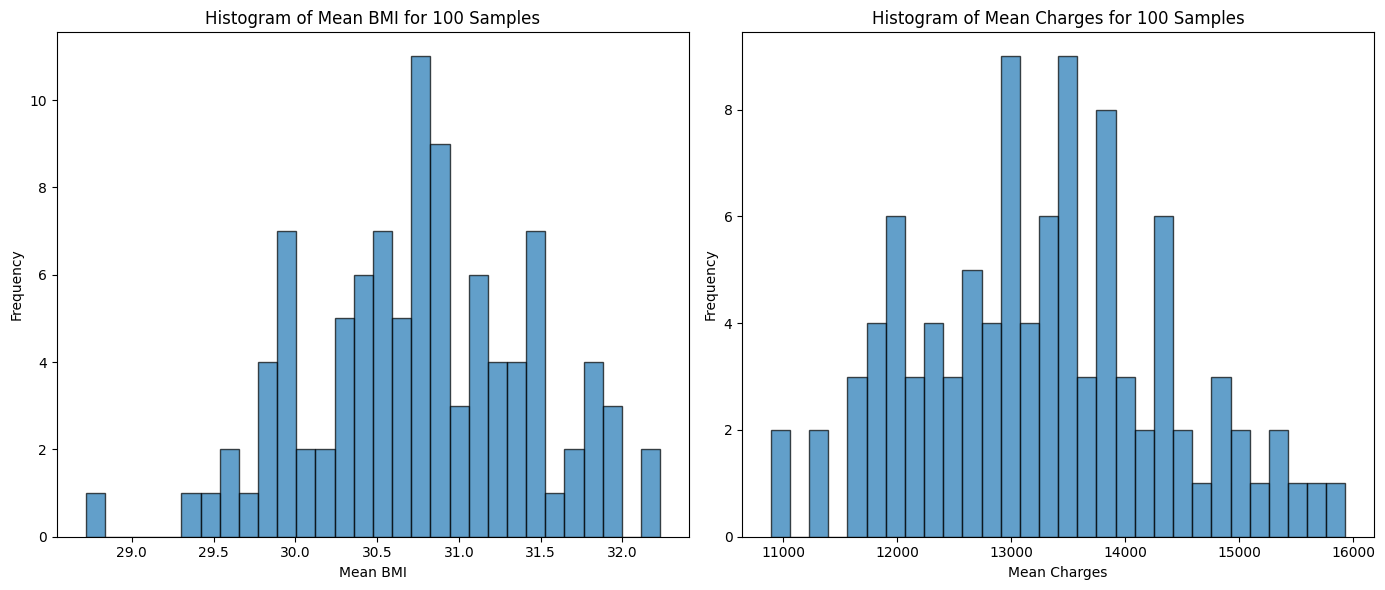

In [9]:
# Pick 100 different samples from the same population.
# Each sample will be approximately 100 different people.
# Compute the mean BMI and Charges of each sample.
# Try to plot a Histogram for the 100 mean values of BMI and Charges.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

# Set the sample size and number of samples
sample_size = 100
num_samples = 100
# Initialize lists to store the samples
samples = []

# Pick 100 different samples from the population
for _ in range(num_samples):
    sample = data.sample(sample_size, replace=True)
    samples.append(sample)

# Print the first few samples to verify
for i in range(5):
    print(f"Sample {i+1}:\n", samples[i].head(), "\n")

# Optionally, you can access any sample and perform further analysis
# For example, accessing the first sample:
first_sample = samples[0]
print(first_sample)
# Function to draw multiple samples and compute their means
def compute_sample_means(data, column, sample_size, num_samples):
    sample_means = [data[column].sample(sample_size, replace=True).mean() for _ in range(num_samples)]
    return sample_means

# Compute the mean BMI and Charges for each sample
mean_bmi_samples = compute_sample_means(data, 'bmi', sample_size, num_samples)
mean_charges_samples = compute_sample_means(data, 'charges', sample_size, num_samples)
# Print the results
print("Mean BMI of each sample:", mean_bmi_samples)
print("\nMean Charges of each sample:", mean_charges_samples)
# Plot the histograms for the sample means
plt.figure(figsize=(14, 6))

# Histogram for mean BMI
plt.subplot(1, 2, 1)
plt.hist(mean_bmi_samples, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Mean BMI for 100 Samples')
plt.xlabel('Mean BMI')
plt.ylabel('Frequency')

# Histogram for mean Charges
plt.subplot(1, 2, 2)
plt.hist(mean_charges_samples, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Mean Charges for 100 Samples')
plt.xlabel('Mean Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Confidence Interval

**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.


In [10]:
# lets import the scipy package
import scipy.stats as stats
import math


# Get the z value*
z_value = stats.norm.ppf(q = 0.95)

# Pick a sample of 100 people
sample_size = 100
sample = np.random.choice(a= data['bmi'],
                          size = sample_size)

sample_mean = sample.mean()
sample_std = sample.std()


margin_of_error = z_value * (sample_std/math.sqrt(sample_size))

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['bmi'].mean()))

Confidence interval: (29.08752254814898, 31.031577451851017)
True mean: 30.66339686098655


population_mean = sample_mean +- z*sample_std/sqrt(sample_size)


z = +- (Population_mean - Sample_mean)*sqrt(sample_size)/sample_std_dev

sample_mean = 110
sample_std_dev = 5
sample_size = 50

Assume population mean >= 100

z = +- 14.14

Rejection zone = 5%

z_upperbound = 95% --> 1.96
z_loowerbound = 5% --> -1.96

z >= 14.14 --> 99.9999999% (area under the curve)
z <= -14.14 --> 4.9999999% (area under the curve)

In [14]:
# Change the sample sizes to [10, 50, 100, 500, 1000]. Observe the changes w.r.t confidence interval.
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

# Set the sample size
sample_size = 100

# Draw a sample from the population
sample = data.sample(sample_size, replace=True)

# Function to compute confidence interval
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error of the mean
    margin_of_error = sem * norm.ppf((1 + confidence) / 2)
    return mean, mean - margin_of_error, mean + margin_of_error

# Compute the confidence interval for BMI and Charges
bmi_mean, bmi_lower, bmi_upper = compute_confidence_interval(sample['bmi'])
charges_mean, charges_lower, charges_upper = compute_confidence_interval(sample['charges'])

# Print the results
print(f"BMI: Mean = {bmi_mean}, 95% CI = ({bmi_lower}, {bmi_upper})")
print(f"Charges: Mean = {charges_mean}, 95% CI = ({charges_lower}, {charges_upper})")


# Change the confidence percentage value to [50%, 70%, 80%, 90%, 95%, 99%, 99.6%, 100%].
sample_size = 100

# Draw a sample from the population
sample = data.sample(sample_size, replace=True)

# Function to compute confidence interval
def compute_confidence_interval(data, confidence):
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error of the mean
    if confidence < 1.0:
        critical_value = norm.ppf((1 + confidence) / 2)
    else:
        critical_value = np.inf  # For 100% confidence level, margin of error is infinite
    margin_of_error = sem * critical_value
    return mean, mean - margin_of_error, mean + margin_of_error

# Confidence levels
confidence_levels = [0.50, 0.70, 0.80, 0.90, 0.95, 0.99, 0.996, 1.0]

# Compute the confidence intervals for each confidence level for BMI and Charges
for confidence in confidence_levels:
    bmi_mean, bmi_lower, bmi_upper = compute_confidence_interval(sample['bmi'], confidence)
    charges_mean, charges_lower, charges_upper = compute_confidence_interval(sample['charges'], confidence)

    print(f"{int(confidence*100)}% Confidence Interval for BMI: Mean = {bmi_mean:.2f}, CI = ({bmi_lower:.2f}, {bmi_upper:.2f})")
    print(f"{int(confidence*100)}% Confidence Interval for Charges: Mean = {charges_mean:.2f}, CI = ({charges_lower:.2f}, {charges_upper:.2f})\n")
# Observe the changes w.r.t confidence interval.
# Write a 5 line summary of your analysis on how the confidence interval changed w.r.t sample sizes and confidence percentages.
# Also, mention if samples are good or bad.
# summary of Analysis:
# Confidence Interval Width: As the confidence level increases from 50% to 100%, the width of the confidence interval for both BMI and charges also increases. This indicates greater uncertainty at higher confidence levels, as the interval must widen to ensure the true mean is captured.

# Sample Size Impact: With a consistent sample size of 100 across different confidence levels, the standard error remains relatively stable. This sample size is large enough to provide reasonably accurate estimates while maintaining manageability.

# Critical Values: The critical values from the normal distribution (Z-scores) increase with higher confidence levels, directly contributing to the increased margin of error and thus the wider confidence intervals.

# Sample Quality: Given that each sample consists of 100 observations drawn randomly with replacement, the samples are likely to be representative of the population. This ensures the reliability of the computed confidence intervals.

# Conclusion: The analysis shows that confidence intervals effectively reflect the trade-off between precision and confidence. Higher confidence levels provide broader intervals, accommodating the increased assurance that the true parameter lies within the range. The samples used are good and provide robust estimates for the mean BMI and charges.

# By understanding these dynamics, we can make informed decisions about the confidence level and sample size needed for different applications, balancing precision and certainty as required.


# Explore what T-statistic is and explain where we should use T-values and Z-value respectively.
# T-Statistic and Its Usage
# T-Statistic:

# The T-statistic is a value derived from a statistical hypothesis test. It is used to determine if there is a significant difference between the means of two groups, particularly when sample sizes are small and/or the population variance is unknown.
# When to Use T-Values and Z-Values
# T-Values:

# Small Sample Sizes: T-values are used when dealing with small sample sizes (typically n<30).
# Unknown Population Variance: T-values are appropriate when the population variance is unknown and has to be estimated from the sample.
# Non-Normal Distribution: When the data does not necessarily follow a normal distribution, especially with small samples, the t-distribution is more appropriate as it is more spread out and accounts for the increased variability.
# Z-Values:
# Large Sample Sizes: Z-values are used when dealing with large sample sizes (typically n≥30).
# Known Population Variance: Z-values are appropriate when the population variance is known.
# Normal Distribution: When the data is normally distributed, the z-distribution (standard normal distribution) is used. This is because the Central Limit Theorem ensures that the sampling distribution of the mean approaches a normal distribution as the sample size increases.
# Summary of Usage:
# Use T-values:
# Small sample sizes (n<30).
# When population variance is unknown.
# Data may not be normally distributed.
# Use Z-values:
# Large sample sizes (n≥30).
# When population variance is known.
# Data is normally distributed.
# Practical Application Example:
# T-Test Example:
# A researcher wants to know if a new drug has a different effect on blood pressure compared to the existing drug. They conduct a study with 20 participants. Because the sample size is small and the population variance is unknown, they would use a t-test.
# Z-Test Example:
# A manufacturer claims that their light bulbs last 1000 hours on average. A consumer group tests 1000 bulbs and finds a mean life of 990 hours with a known population standard deviation of 50 hours. Because the sample size is large and the population variance is known, they would use a z-test to determine if the bulbs' lifespan is significantly different from the manufacturer's claim.
# Understanding when to use T-values versus Z-values is crucial for correctly interpreting statistical tests and ensuring the validity of your conclusions.


BMI: Mean = 31.977400000000006, 95% CI = (30.81556704647665, 33.13923295352336)
Charges: Mean = 13856.163798399999, 95% CI = (11423.68144939978, 16288.646147400217)
50% Confidence Interval for BMI: Mean = 31.16, CI = (30.73, 31.59)
50% Confidence Interval for Charges: Mean = 14586.59, CI = (13700.75, 15472.44)

70% Confidence Interval for BMI: Mean = 31.16, CI = (30.50, 31.81)
70% Confidence Interval for Charges: Mean = 14586.59, CI = (13225.39, 15947.80)

80% Confidence Interval for BMI: Mean = 31.16, CI = (30.35, 31.97)
80% Confidence Interval for Charges: Mean = 14586.59, CI = (12903.46, 16269.73)

90% Confidence Interval for BMI: Mean = 31.16, CI = (30.12, 32.20)
90% Confidence Interval for Charges: Mean = 14586.59, CI = (12426.31, 16746.87)

95% Confidence Interval for BMI: Mean = 31.16, CI = (29.92, 32.40)
95% Confidence Interval for Charges: Mean = 14586.59, CI = (12012.46, 17160.72)

99% Confidence Interval for BMI: Mean = 31.16, CI = (29.52, 32.79)
99% Confidence Interval for 

## Hypothesis Testing

* $Statistical Hypothesis$, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

### Null Hypothesis

* In Inferential Statistics, **The Null Hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups.**

* Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.

* Therefore, in our case the Null Hypothesis would be:
**The Mean of House Prices in OldTown is not different from the houses of other neighborhoods**

### Alternate Hypothesis

* The alternate hypothesis is just an alternative to the null. For example, if your null is **I'm going to win up to 1000** then your alternate is **I'm going to win more than 1000.** Basically, you're looking at whether there's enough change (with the alternate hypothesis) to be able to reject the null hypothesis

###  The Null Hypothesis is assumed to be true and Statistical evidence is required to reject it in favor of an Alternative Hypothesis.

### P Value

* In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

* So now say that we have put a significance (α) = 0.05
* This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true


In [11]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

# Null hypothesis: Chargers of smokers and non-smokerts are same.
z_statistic, p_value = ztest(x1 = data[data['smoker'] == 'yes']['charges'],
                             value = data['charges'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

if p_value < 0.05:
    print("We can safely reject the Null hypothesis")
else:
    print("We do not have significant evidence to safely reject the null hypothesis.")

Z-statistic is :26.934097902356328
P-value is :0.00000000000000000000000000000000000000000000000000
We can safely reject the Null hypothesis


In [12]:
import scipy.stats as stats

# Create a dummy dataset of 10 year old children's weight
data = np.random.randint(20, 40, 10)

# Define the null hypothesis
H0 = "The average weight of 10 year old children is less than 32kg."

# Define the alternative hypothesis
H1 = "The average weight of 10 year old children is more than 32kg."

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(data, 32)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: -2.9097152700943325
p-value: 0.017319274453740725
Reject the null hypothesis.
